In [8]:
import numpy as np
import os
import sys
import pandas as pd
import pickledb
currentdir = os.path.dirname(os.path.realpath('__file__'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from dataset import Dataset
from tools import *
import matplotlib.pyplot as plt
from  nearest_neighbor_search import NNS

from akll import AKLL
from kll import KLL
from functools import wraps
from time import time

In [9]:
dataset_name = 'phishing.csv'
dataset_path=f'{parentdir}/dataset/{dataset_name}'
x = Dataset(dataset_path)

func:Dataset.__init__ took: 0.08600068092346191 sec


In [3]:
db_init()
t=AKLL(x)
c=t.fit(2,5,4)
com,s=get_log()
# plt.scatter(t.X[:,0],t.X[:,1])
# plt.scatter(c[:,0],c[:,1])


C:\Users\Mohammad\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


func:Dataset.__init__ took: 0.0 sec
func:KPP.fit took: 0.0 sec
func:AKLL.fit took: 4.1239848136901855 sec


In [4]:
'hhhb'.split('.')[-1]


'hhhb'

In [5]:
# algorithm 1 K-Means++
class kpp:
    

    def __init__(
        self,
        dataset:Dataset
        )->None:

        
        self.dataset = dataset
        self.n=dataset.number_of_sample
        self.d=dataset.number_of_feature
        self.X=dataset.sample
        self.m = None
        self.K=None


    
    def fit(
        self,
        number_of_cluster:int ,
        sample_weight:np.ndarray=None
        )->np.ndarray:
        
        self.m=np.empty((0, self.d))
        self.K=number_of_cluster


            
        assert self.n>self.K and self.K >0 ,\
            'number of cluster should be in range [1,n)' 
            
        if sample_weight is not None:
            self.sample_weight=np.array(sample_weight)
        else:
            self.sample_weight=np.ones(self.n)
       
        self.sample_weight=self.sample_weight.reshape((-1,1)) 
        # line 1
        beta=self.sample_weight/np.sum(self.sample_weight)
        # line 2

        m=np.vstack((self.m,new_seed(self.X,1,beta)))
        # line 3
        alpha=np.array([np.inf]*self.n).reshape((-1,1))
        k=1
        # line 4
        while k <self.K:
            # line 5,6
            alpha=np.minimum(alpha,distance(self.X,m[k-1]))
            # line 7,8
            t=self.sample_weight*(alpha**2)
            beta=t/np.sum(t)
            # line 9
            k+=1
            # line 10
            m=np.vstack((m,new_seed(self.X,1,beta)))
        self.m=m
        # line 11
        return np.array(m)
    
    

In [6]:
t=kpp(x)


In [7]:
t.fit(-2)

AssertionError: number of cluster should be in range [1,n)

In [ ]:

m=np.empty((0,t.d))
m=np.vstack((m,new_seed(t.X,1,beta)))
m=np.vstack((m,new_seed(t.X,1,beta)))
m=np.vstack((m,new_seed(t.X,1,beta)))
m

array([[2., 0.],
       [2., 3.],
       [3., 3.]])

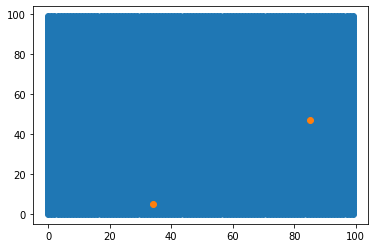

In [ ]:
t=kll()
c=t.fit(2)
plt.scatter(t.X[:,0],t.X[:,1])
plt.scatter(c[:,0],c[:,1])

In [ ]:
c=np.array([[0,0],[2,2]])

In [ ]:
j=np.array([[0,2],[0,4]])

In [ ]:
np.linalg.norm(c[:,None,:]-j,axis=2)  

array([[2.        , 4.        ],
       [2.        , 2.82842712]])

In [ ]:
j=np.empty(5)

In [ ]:
def execution_time2(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print(f"func:{f.__name__} class:{f.__qualname__} took: {te-ts} sec")

        return result

    return wrap

def exclogger(f):
    #  computations logger
    @wraps(f)
    def wrap(*args, **kw):
        x=args[0].shape[0]
        y=args[1].shape[0]
        num_of_computations=x*y
        output_path='log.csv'
        if not os.path.exists(output_path):
            open(output_path, mode='a').close()
            df=pd.DataFrame(['computation'])
            df.to_csv(output_path,index=False, mode='a' ,encoding='utf-8-sig',header=False )

        df=pd.DataFrame([num_of_computations])
        df.to_csv(output_path,index=False, mode='a' ,encoding='utf-8-sig',header=False )


        return f(*args, **kw)

    return wrap  





def logger(f):
    #  computations logger
    @wraps(f)
    def wrap(*args, **kw):
        x=args[0].shape[0]
        y=args[1].shape[0]
        num_of_computations=x*y
        db = pickledb.load('log.db', False)
        db.set('c_sum',db.get('c_sum')+num_of_computations)
        c=db.get('computations')
        db.set('computations',[*c,num_of_computations])
        db.dump()
        return f(*args, **kw)

    return wrap 

@execution_time2
def runner(iter:int,k:int):
    dis = []
    for i in range(iter):
        
        t.fit(k,5,k*2)
        dis.append(distance(t.c[0], t.c[1]))
    # plt.scatter(akpp.X[:, 0], akpp.X[:, 1])
    # plt.scatter(akpp.m[:, 0], akpp.m[:, 1])
    # plt.show()
    return np.mean(dis)


class Computer:

    def __init__(self,cpu):
        self.cpu = cpu
    @execution_time2
    def speed(self):
        z=(1000//self.cpu)
        for i in range(z):
            pass

c=Computer(10)
c.speed()

func:speed class:Computer.speed took: 0.0 sec


In [ ]:
# beta=t.sample_weight/np.sum(t.sample_weight)
# new_seed(x.sample,1,beta).shape

@tlogger
def dist(X: np.ndarray, Y: np.ndarray):
    """
    Parameters:
        X: nxd data(s)
        Y: mxd point(s)

    Returns:
        d: nxm ndarray contain distance of data to each point
    """
    if len(X.shape) == 1:
        X = X.reshape((1, -1))
    if len(Y.shape) == 1:
        Y = Y.reshape((1, -1))
    assert len(X.shape) == 2, "X should be nxd ndarray"
    assert (
        len(Y.shape) == 2 and Y.shape[1] == X.shape[1]
    ), "y should be in X space"
    return np.linalg.norm((X[:, np.newaxis, :] - Y), axis=-1)

    

In [ ]:
i=np.array([[1,2,3,4,5],[1,3,5,7,9],[1,3,5,7,9]])
j=np.array([[2,4,6,8,10]])

dist(i,j)

array([[7.41619849],
       [2.23606798],
       [2.23606798]])

In [ ]:
# pd.read_csv('log.csv',encoding='utf-8-sig')
dist.sum

12

In [ ]:
def tlogger(f):
    def wrapped(*args, **kwargs):
        x=args[0].shape[0]
        y=args[1].shape[0]
        num_of_computations=x*y
        wrapped.sum+=num_of_computations
        return f(*args, **kwargs)
    wrapped.sum = 0
    return wrapped

In [ ]:
c*j**2/np.sum(c*j**2)

array([0.12698413, 0.01587302, 0.85714286])

In [ ]:
# %%file kll.py
# import numpy as np
# from dataset import Dataset
# from tools import distance, new_seed, execution_time


# algorithm 3 K-Means ||
class kll:
    def __init__(self, dataset: Dataset) -> None:
        self.dataset = dataset
        self.n = dataset.number_of_sample
        self.d = dataset.number_of_feature
        self.X = dataset.sample
        self.c = None
        self.K = None
        self.R = None
        self.l = None

    @execution_time
    def fit(
            self, number_of_cluster: int,
            rounds:int=5,
            oversampling_factor:int=1,
            sample_weight: np.ndarray = None) -> np.ndarray:

        self.c = np.empty((0, self.d))
        self.K = number_of_cluster
        self.R = rounds
        self.l = oversampling_factor

        assert self.R>0 and self.l>0 , \
            'invalid function parameter'
        assert self.n>self.K and self.K >0 ,\
            'number of cluster should be in range [1,n)' 

        if sample_weight is not None:
            self.sample_weight = np.array(sample_weight)
        else:
            self.sample_weight = np.ones(self.n)
       
        self.sample_weight = self.sample_weight.reshape((-1, 1))
        # line 1 algorithm 1
        beta = self.sample_weight/np.sum(self.sample_weight)
        # line 2 algorithm 1
        c = np.vstack((self.c, new_seed(self.X, 1, beta)))
        # line 3 algorithm 1
        alpha = np.array([np.inf]*self.n).reshape((-1, 1))
        k = 1
        kp = 0
        # line 4,5,6 algorithm 1
        for r in range(self.R):
            for i in range(self.n):
                for j in range(kp,k):
                    # line 7 algorithm 1
                    alpha[i] = np.minimum(
                        alpha[i], distance(self.X[i], c[j]))

            # line 8,9 algorithm 1
            kp = k
            t = self.sample_weight*(alpha**2)
            z = np.sum(t)
            # line 10,11,12 algorithm 3
            for i in range(self.n):
                p=(self.l*self.sample_weight[i]*(alpha[i]**2)/z)
                if p > np.random.rand(1)[0]:
                    k+=1
                    c=np.vstack((c, self.X[i]))
                    alpha[i]=0
       
        # line 13 algorithm 3
        wp=np.empty((0,1))
        for i in range(c.shape[0]):
            s=0
            for j in range(self.n):
                wj=self.sample_weight[j]
                indic= 1 if distance(self.X[j], c[i])==alpha[j] else 0
                s+=wj*indic
           
            wp=np.vstack((wp,s))
        self.c=c
        # line 14 algorithm 3
        kpp_=kpp(Dataset(np.array(c)))

        return kpp_.fit(self.K,wp)
            

# t=kll(x)
# c=t.fit(2,5,4)
# plt.scatter(t.X[:,0],t.X[:,1])
# plt.scatter(c[:,0],c[:,1])


Writing kll.py


In [ ]:
assert -1   , ' heeee'

In [ ]:
x.number_of_sample

25

In [ ]:
def encode(y):            
    return (np.arange(np.unique(y).size) == y)

In [ ]:
encode()

C:\Users\Mohammad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


False

In [ ]:
0//0

ZeroDivisionError: integer division or modulo by zero

In [ ]:
d= 1 if 3==5 else 0
d

0

In [ ]:
g=distance(x.sample[1], x.sample[5])

In [ ]:
1 if g>np.array([[1]]) else 0

1

In [ ]:
g

array([[1.41421356]])

In [ ]:
y=np.array([[1,2],[3,4]])
# Dataset(y)
x=Dataset(y)

In [ ]:
x.number_of_feature

2

In [ ]:
f=np.empty((0,2))

In [ ]:
f

array([], shape=(0, 20), dtype=float64)

In [ ]:
f=np.vstack((f,np.array([1,2])))

In [ ]:
f

array([[1., 2.]])

In [ ]:
import numpy as np
from dataset import Dataset
from tools import distance, new_seed, execution_time
import kpp


# algorithm 5 Accelerated K-Means ||
class Akll:
    def __init__(self, dataset: Dataset) -> None:
        self.dataset = dataset
        self.n = dataset.number_of_sample
        self.d = dataset.number_of_feature
        self.X = dataset.sample
        self.c = None
        self.K = None
        self.R = None
        self.L = None

    @execution_time
    def fit(
        self,
        number_of_cluster: int,
        rounds: int = 5,
        oversampling_factor: int = 1,
        sample_weight: np.ndarray = None,
    ) -> np.ndarray:

        self.c = np.empty((0, self.d))
        self.K = number_of_cluster
        self.R = rounds
        self.L = oversampling_factor

        assert self.R > 0 and self.L > 0, "invalid function parameter"
        assert (
            self.n > self.K and self.K > 0
        ), "number of cluster should be in range [1,n)"

        if sample_weight is not None:
            self.sample_weight = np.array(sample_weight)
        else:
            self.sample_weight = np.ones(self.n)

        self.sample_weight = self.sample_weight.reshape((-1, 1))
        # line 1 algorithm 5
        beta = self.sample_weight / np.sum(self.sample_weight)
        # line 2 algorithm 5
        c = np.vstack((self.c, new_seed(self.X, 1, beta)))
        # line 3 algorithm 5
        alpha = np.array([np.inf] * self.n).reshape((-1, 1))
        k = 1
        kp = 0
        # line 4 algorithm 5
        for r in range(self.R):
            # line  5, 6,7 algorithm 5
            #  C ← new index built from {ckprev, . . . , ck }
            for i in range(self.n):
                j=None # j=C.nearestinrange(xi,ai)
                # line 8,9 algorithm 5
                if j>=0:
                    alpha[i] = distance(self.X[i], c[j])

            # line 10 algorithm 5
            kp = k
            t = self.sample_weight * (alpha**2)
            z = np.sum(t)
            # line 11,12,13 algorithm 5
            for i in range(self.n):
                p = self.L * self.sample_weight[i] * (alpha[i] ** 2) / z
                if p > np.random.rand(1)[0]:
                    k += 1
                    c = np.vstack((c, self.X[i]))
                    alpha[i] = 0

        # line 14 algorithm 5
        wp = np.empty((0, 1))
        for i in range(c.shape[0]):
            s = 0
            for j in range(self.n):
                wj = self.sample_weight[j]
                indic = 1 if distance(self.X[j], c[i]) == alpha[j] else 0
                s += wj * indic

            wp = np.vstack((wp, s))
        self.c = c
        # line 15 algorithm 5
        kpp_ = kpp(Dataset(np.array(c)))

        return kpp_.fit(self.K, wp)


In [ ]:
import vptree

# Define distance function.
def euclidean(p1, p2):
  return np.sqrt(np.sum(np.power(p2 - p1, 2)))

# Generate some random points.
points = np.random.randn(20, 2)
query = [0] * 2

# Build tree in O(n log n) time complexity.
tree = vptree.VPTree(points, euclidean)

# Query single point.
res=tree.get_nearest_neighbor(query)

# Query n-points.
# tree.get_n_nearest_neighbors(query, 10)

# Get all points within certain distance.
# tree.get_all_in_range(query, 3.14)

In [ ]:
# plt.scatter(points[:,0],points[:,1])
# plt.scatter(res[1][0],res[1][1])

In [ ]:
# import copy


# def g(tree):
#     return copy.deepcopy(tree)
# y=g(tree)
type(db.get('c_sum'))

int

In [ ]:
# y=g(tree)
# while True: 

#     right=y.right
#     if not right:
#         break

#     print(right.vp)

#     y=right

In [ ]:


db = pickledb.load('log.db', False)

db.set('computations',[])

db.set('c_sum',0)


db.dump()

True

In [ ]:
db = pickledb.load('log.db', False)
print(db.get('c_sum'))

30


In [ ]:

db = pickledb.load('log.db', False)

g=db.get('computations')
db.set('computations',[*g,0])
db.dump()
# print(c)
# c+=2
# # # y=c.append(2)
# db.set('c_sum',c)
print(g)

[0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(c)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5]


In [ ]:
db.set('computations',[12])
db.dump()

True

In [ ]:
n=np.array([12])

In [ ]:
y=n

In [ ]:
n.pop()

AttributeError: 'numpy.ndarray' object has no attribute 'pop'

In [ ]:
class clog:
 
    def __init__(self, function):
        self.function = function
        self.s=0
 
    def __call__(self,*params):
        x = params[0].shape[0]
        y = params[1].shape[0]
        self.s+=x*y
        return self.function(*params)
           

        # if any([isinstance(i, str) for i in params]):
        #     raise TypeError("parameter cannot be a string !!")
        # else:
        #     return self.function(*params)
 
 
# @clog
# def add_numbers(*numbers):
#     return sum(numbers)
 
# #  returns 6
# print(add_numbers(1, 2, 3))
 
# # raises Error. 
# print(add_numbers(1, '2', 3)) 

In [ ]:
clog.s

AttributeError: type object 'clog' has no attribute 's'


running kll for k:32
func:Dataset.__init__ took: 0.0 sec
func:KPP.fit took: 0.004997968673706055 sec
func:KLL.fit took: 32.354804039001465 sec

running akll for k:32
func:Dataset.__init__ took: 0.0 sec
func:KPP.fit took: 0.00500035285949707 sec
func:AKLL.fit took: 36.22336459159851 sec

running kll for k:64
func:Dataset.__init__ took: 0.0 sec
func:KPP.fit took: 0.01299738883972168 sec
func:KLL.fit took: 57.1912784576416 sec

running akll for k:64
func:Dataset.__init__ took: 0.0 sec
func:KPP.fit took: 0.013987541198730469 sec
func:AKLL.fit took: 71.05224084854126 sec

running kll for k:128
func:Dataset.__init__ took: 0.0 sec
func:KPP.fit took: 0.040990591049194336 sec
func:KLL.fit took: 122.09068036079407 sec

running akll for k:128
func:Dataset.__init__ took: 0.0 sec
func:KPP.fit took: 0.04001021385192871 sec
func:AKLL.fit took: 114.7826783657074 sec

running kll for k:256
func:Dataset.__init__ took: 0.0 sec
func:KPP.fit took: 0.1372687816619873 sec
func:KLL.fit took: 243.392289638519

m:\uni\SPR\final\imp\Exact-Acceleration-of-K-Means-and-K-Means-parallel\akll.py:91: RuntimeWarning: invalid value encountered in true_divide
  p = min(1, self.L * self.w[i] * (alpha[i] ** 2) / Z)


func:Dataset.__init__ took: 0.0 sec
func:KPP.fit took: 8.74393916130066 sec
func:AKLL.fit took: 629.2258257865906 sec


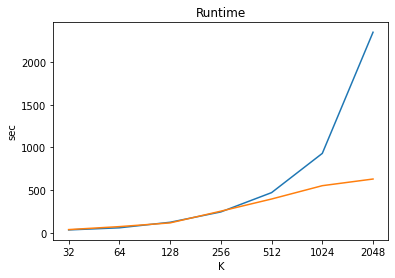

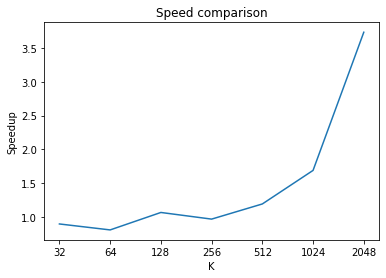

pause
pause
pause
pause


In [12]:

# from time import time
# from matplotlib import pyplot as plt
# import numpy as np
# from akll import AKLL
# from dataset import Dataset
# from kll import KLL



# dataset = x

k = np.arange(5, 12)
# k = np.arange(5, 8) 

kll_log = []
akll_log = []

for i in k:
    try:
        K = 2**i
    
        print(f"\nrunning kll for k:{K}")
        kll = KLL(x)
        ts = time()
        centers = kll.fit(K)
        te = time()
        kll_log.append(te - ts)

        print(f"\nrunning akll for k:{K}")
        akll = AKLL(x)
        ts = time()
        centers = akll.fit(K)
        te = time()
        akll_log.append(te - ts)
    except Exception as e:
        print(e)


x_axis = (2**k).astype(str)

plt.plot(x_axis, kll_log, "-", label="kll_log")
plt.plot(x_axis, akll_log, "-", label="akll_log")
plt.xlabel("K")
plt.ylabel("sec")
plt.title("Runtime")
plt.savefig(f"plot/Runtime_k_{k[0]}-{k[-1]}_phishing")
plt.show()

speedup_result = np.divide(kll_log, akll_log)
plt.plot(x_axis, speedup_result, "-")
plt.xlabel("K")
plt.ylabel("Speedup")
plt.title("Speed comparison")
plt.savefig(f"plot/Speed_comparison_k_{k[0]}-{k[-1]}_phishing")
plt.show()

print("pause")
print("pause")
print("pause")
print("pause")

In [13]:
df=pd.DataFrame(np.array([kll_log,akll_log,speedup_result]).T,columns=['kll_log','akll_log','speedup_result'])
df.to_csv('phishing_log_5_12.csv',index=False,encoding='utf-8-sig' )

In [ ]:
np.arange(5,7)

array([5, 6])

In [ ]:
kll_log

[36.58770680427551,
 84.42944145202637,
 155.62252402305603,
 349.53011417388916,
 831.4781627655029]

In [ ]:
akll_log

[35.75579357147217,
 69.52571272850037,
 142.1574022769928,
 270.3126480579376,
 621.2465779781342]

In [ ]:
speedup_result

array([1.02326653, 1.21436283, 1.09471981, 1.29305867, 1.33840281])

In [ ]:
speedup_result = np.divide(kll_log, akll_log)

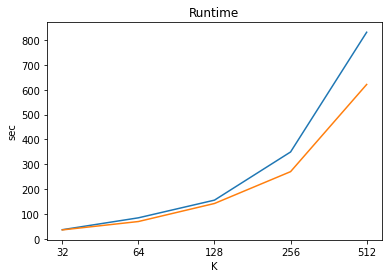

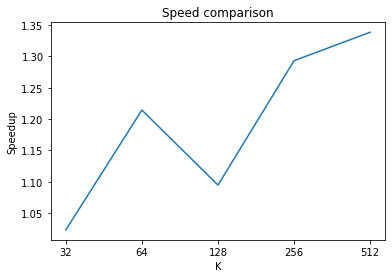

In [ ]:
k=np.arange(5,10)
x_axis = (2**k).astype(str)

plt.plot(x_axis, kll_log, "-", label="kll_log")
plt.plot(x_axis, akll_log, "-", label="akll_log")
plt.xlabel("K")
plt.ylabel("sec")
plt.title("Runtime")
plt.savefig(f"plot/Runtime_k_{k[0]}-{k[-1]}_phishing")
plt.show()

speedup_result = np.divide(kll_log, akll_log)
plt.plot(x_axis, speedup_result, "-")
plt.xlabel("K")
plt.ylabel("Speedup")
plt.title("Speed comparison")
plt.savefig(f"plot/Speed_comparison_k_{k[0]}-{k[-1]}_phishing")
plt.show()